## Desafio BB de Computação Afetiva

### Objetivo: detectar sentimento expresso nas faces

Informações gerais disponíveis no <a href="https://github.com/experimenteBB/desafioBBCpuAfetiva">github do desafio</a>.

### Plano Geral
1. conhecer as imagens/dados
2. processar as imagens:
a. alterar as imagens para tons de cinza (gray), o que reduz a quantidade de canais de 3 para 1
b. recortar as imagens de forma a manter somente a face
c. alterar o tamanho das imagens, de forma que sejam uniformes
d. criar a classe das imagens
e. padronizar as imagens
3. dividir os dados em treino e teste
4. treinar e avaliar o modelo
a) treinar o modelo com base nos dados de teste
b) avaliar o modelo
c) repetir os itens 4.a e 4.b quantas vezes for necessário
5. salvar o modelo
6. criar o script Py

Sentimentos a detectar:
* 0-neutro
* 1-feliz
* 2-triste
* 3-surpreso
* 4-bravo

### 1. Conhecer as imagens/dados

In [1]:
# visualizar algumas imagens:
import cv2
import matplotlib.pyplot as plt

In [2]:
# Função para visualizar imagens:
def visualizar_imagem(url_da_imagem):
    """ Visualizar imagem """
    imagem = cv2.imread(url_da_imagem) # carregar a imagem na URL informada
    img_cv = imagem.copy()
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB) # converte a imagem de BGR (padrão OCV) para RGB
    fig = plt.figure(figsize = (7,5))
    ax = fig.add_subplot(111)
    ax.imshow(img_cv, cmap = 'gray')
    return img_cv

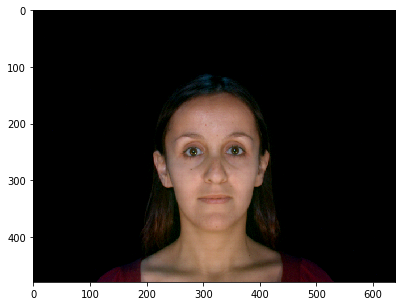

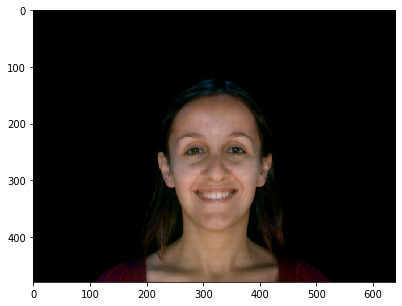

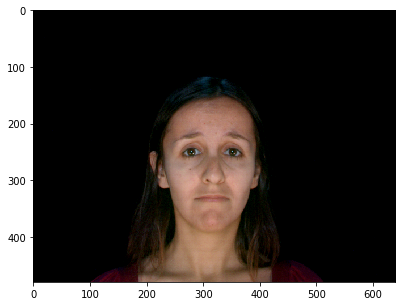

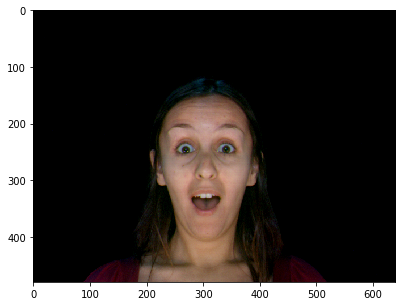

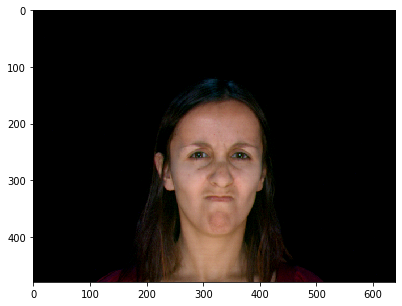

In [3]:
# carregar primeira amostra de imagens
img_neutro   = visualizar_imagem('DADOS/s001/bmp/s001-00_img.bmp')
img_feliz    = visualizar_imagem('DADOS/s001/bmp/s001-01_img.bmp')
img_triste   = visualizar_imagem('DADOS/s001/bmp/s001-02_img.bmp')
img_surpreso = visualizar_imagem('DADOS/s001/bmp/s001-03_img.bmp')
img_bravo    = visualizar_imagem('DADOS/s001/bmp/s001-04_img.bmp')

In [4]:
# verificar o shape das imagens da primeira amostra
lista_imagens = [img_neutro, img_feliz, img_triste, img_surpreso, img_bravo]

for imagem in lista_imagens:
    print(imagem.shape)

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


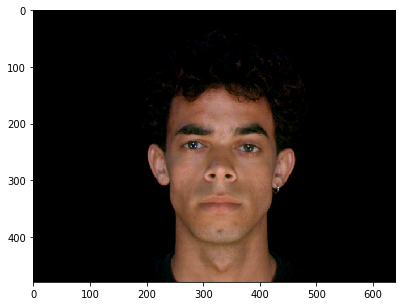

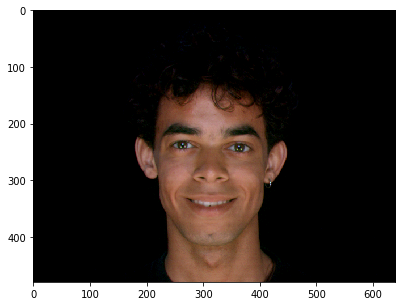

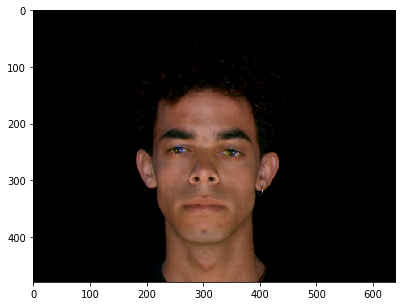

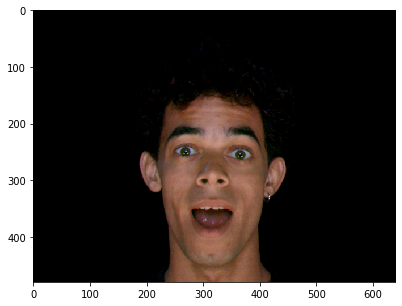

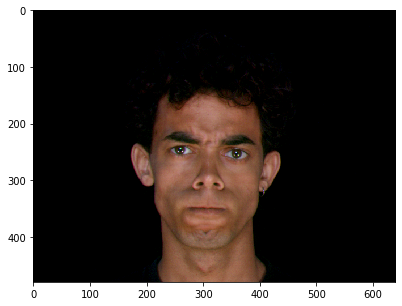

In [5]:
# Verificar os dados em uma segund amostra
img_neutro   = visualizar_imagem('DADOS/s013/bmp/s013-00_img.bmp')
img_feliz    = visualizar_imagem('DADOS/s013/bmp/s013-01_img.bmp')
img_triste   = visualizar_imagem('DADOS/s013/bmp/s013-02_img.bmp')
img_surpreso = visualizar_imagem('DADOS/s013/bmp/s013-03_img.bmp')
img_bravo    = visualizar_imagem('DADOS/s013/bmp/s013-04_img.bmp')

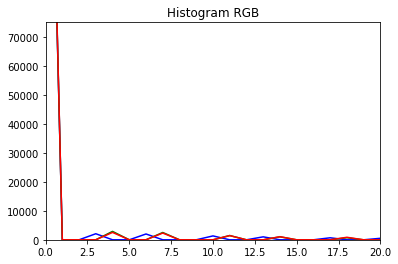

In [6]:
# visualizar o histograma das cores
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_feliz],[i],None,[256],[0,256])
    plt.plot(histr, color = col)
    plt.ylim([0, 75000])
    plt.xlim([0,20])
plt.title('Histogram RGB')
plt.show()

In [7]:
# verificar o shape das imagens
lista_imagens = [img_neutro, img_feliz, img_triste, img_surpreso, img_bravo]

for imagem in lista_imagens:
    print(imagem.shape)

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


### Conclusões
* as imagens são coloridas
* as faces são frontais
* tamanho é de 480 x 640

### 2. Processar as imagens

In [8]:
# refazer a função que importa e visualiza as imagens:
# agora retorna em escala de cinza
def visualizar_imagem_gray(url_da_imagem):
    """ Visualizar imagem em escala de cinza """
    imagem = cv2.imread(url_da_imagem) # carregar a imagem na URL informada
    img_cv = imagem.copy()
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY) # converte a imagem de BGR (padrão OCV) para tons de cinza
    fig = plt.figure(figsize = (7,5))
    ax = fig.add_subplot(111)
    ax.imshow(img_cv, cmap = 'gray')
    print(img_cv.shape)
    return img_cv

(480, 640)


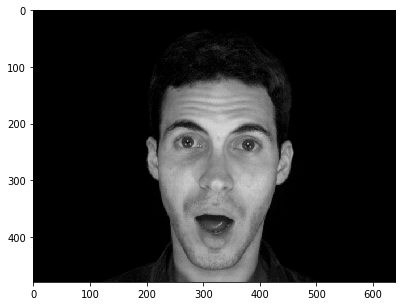

In [9]:
# visualizar em nova imagem como teste:
img_para_teste = visualizar_imagem_gray('DADOS/s007/bmp/s007-03_img.bmp')

canto inferior esquerdo:  173
canto superior esquerdo:  120
canto inferior direito :  482
canto superior direito :  429


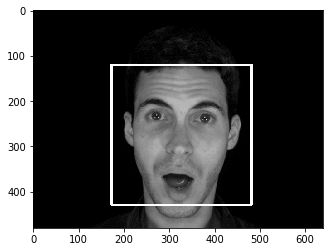

In [10]:
# detectar o rosto na imagem de teste
# XML obtido em https://github.com/opencv/opencv/tree/master/data/haarcascades

# criar o detector importando o XML
face_cascade = cv2.CascadeClassifier('DADOS/haarcascades/haarcascade_frontalface_default.xml')

# função para detectar a face:
def detectar_face(imagem):
    face_img = imagem.copy()
    # retângulo delimitador da imagem
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x, y, w, h) in face_rects: 
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255,255,255), 3) 
        print('canto inferior esquerdo: ', x)
        print('canto superior esquerdo: ', y)
        print('canto inferior direito : ', x + w)
        print('canto superior direito : ', y + h)
    return face_img

# verificar o resultado na imagem de teste:
plt.imshow(detectar_face(img_para_teste), cmap = 'gray')

(309, 309)


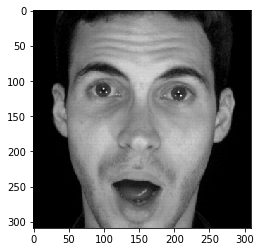

In [11]:
# com base nos valores impressos acima, visualizar a região de interesse (region of interest)
roi = img_para_teste[120:429, 173:482]
print(roi.shape)
plt.imshow(roi, cmap = 'gray')

OK, tem-se uma função que recebe url de imagem e retorna região de interesse  (150, 150)


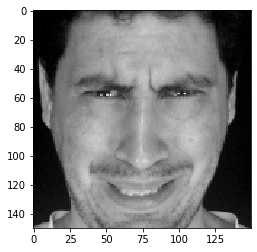

In [12]:
# criar nova função que recebe a imagem e retorna a região de interesse:
def detectar_roi(url_da_imagem):
    imagem = cv2.imread(url_da_imagem) # carregar a imagem na URL informada
    face_img = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) # converte a imagem de BGR (padrão OCV) para tons de cinza
    face = face_cascade.detectMultiScale(face_img)
    # canto inferior esquerdo
    cie = face[0][0]
    # canto superior esquerdo
    cse = face[0][1]
    # canto inferior direito
    cid = cie + face[0][2]
    # canto superior direito
    csd = cse + face[0][3]
    
    roi_img = face_img[cse:csd, cie:cid]
    img = cv2.resize(roi_img,(150, 150), interpolation = cv2.INTER_CUBIC)
    return img

# teste da nova função
img_para_teste = detectar_roi('DADOS/s018/bmp/s018-04_img.bmp')
plt.imshow(img_para_teste, cmap = 'gray')
print('OK, tem-se uma função que recebe url de imagem e retorna região de interesse ', img_para_teste.shape)

In [13]:
# criar dicionário com as urls das imagens mais os sentimentos

# variáveis:
url_classes = {}
path    = 'DADOS/'
pref    = 's0'
bmp     = 'bmp'
estr1   = list(range(1, 29))
classes = list(range(0, 5))
pastas  = []
files   = []
img     = 0

# criar lista de diretórios
for i in estr1:
    if i < 10:
        diretorio = path + pref + '0' + str(i) + '/' + bmp + '/'
    else:
        diretorio = path + pref + str(i) + '/' + bmp + '/'
    
    pastas.append(diretorio)

# criar lista de arquivos
for arquivo in pastas:
    for classe in classes:
        arq = arquivo[6:10] + '-0' + str(classe) + '_img.bmp'
        files.append(arq)
        
# criar o dicionário
for dir in pastas:
    for i in range(0, 5):
        imagem = dir + files[img]
        img += 1
        url_classes[imagem] = i

In [14]:
# criar dicionário de imagens com sua classe
# neste novo dicionário, as imagens serão cortadas usando a função detectar_roi
imagem_classe = {}
X = []
y = []

for url_imagem, classe_imagem in url_classes.items():
    try:
        img = detectar_roi(url_imagem)
        if (img.max() > 0): # certificar que existe imagem
            X.append(img)
            y.append(classe_imagem)
    except:
        print('Falha em: ', url_imagem)
        
print('Tamanho dados em X:', len(X))
print('Tamanho dados em y:', len(y))

Falha em:  DADOS/s020/bmp/s020-00_img.bmp
Falha em:  DADOS/s020/bmp/s020-01_img.bmp
Falha em:  DADOS/s020/bmp/s020-02_img.bmp
Falha em:  DADOS/s020/bmp/s020-03_img.bmp
Falha em:  DADOS/s020/bmp/s020-04_img.bmp
Falha em:  DADOS/s022/bmp/s022-00_img.bmp
Falha em:  DADOS/s022/bmp/s022-01_img.bmp
Falha em:  DADOS/s022/bmp/s022-02_img.bmp
Falha em:  DADOS/s022/bmp/s022-03_img.bmp
Falha em:  DADOS/s022/bmp/s022-04_img.bmp
Tamanho dados em X: 130
Tamanho dados em y: 130


### 3. Dividir os dados em treino e teste

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(len(X_train))
print(len(X_test))

104
26


In [16]:
# categorizar os labels
from keras.utils import to_categorical

y_train_catg = to_categorical(y_train)
y_test_catg  = to_categorical(y_test)

Using TensorFlow backend.


In [17]:
import numpy as np

# transformar as listas em Numpy Array
X_train = np.array(X_train)
X_test  = np.array(X_test)

# alterar os formatos dos arrays para incluir o canal
X_train = X_train.reshape(104, 150, 150, 1)
X_test  = X_test.reshape(26, 150, 150, 1)

# Resultado
print(X_train.shape)
print(X_test.shape)

(104, 150, 150, 1)
(26, 150, 150, 1)


### 4. Treinar e avaliar o modelo

In [18]:
# construir o modelo

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(150, 150, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 147, 147, 32)      544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 170528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               87310848  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)              

In [19]:
# treinar o modelo
model.fit(X_train, y_train_catg, epochs = 50)

Epoch 1/50
104/104 [==============================] - 4s 39ms/step - loss: 2457.5219 - accuracy: 0.1923
Epoch 2/50
104/104 [==============================] - 4s 37ms/step - loss: 134.5118 - accuracy: 0.2019
Epoch 3/50
104/104 [==============================] - 4s 36ms/step - loss: 97.5349 - accuracy: 0.2019
Epoch 4/50
104/104 [==============================] - 4s 37ms/step - loss: 32.0032 - accuracy: 0.2212
Epoch 5/50
104/104 [==============================] - 4s 36ms/step - loss: 32.2144 - accuracy: 0.1827
Epoch 6/50
104/104 [==============================] - 4s 36ms/step - loss: 23.1864 - accuracy: 0.2212
Epoch 7/50
104/104 [==============================] - 4s 35ms/step - loss: 10.7942 - accuracy: 0.1154
Epoch 8/50
104/104 [==============================] - 4s 35ms/step - loss: 9.2290 - accuracy: 0.2308
Epoch 9/50
104/104 [==============================] - 4s 36ms/step - loss: 4.9170 - accuracy: 0.1346
Epoch 10/50
104/104 [==============================] - 4s 35ms/step - loss: 4.568

In [20]:
# Relatório de avaliação do modelo
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.20      0.15         5
           1       0.25      0.20      0.22         5
           2       0.33      0.60      0.43         5
           3       1.00      0.83      0.91         6
           4       0.00      0.00      0.00         5

    accuracy                           0.38        26
   macro avg       0.34      0.37      0.34        26
weighted avg       0.37      0.38      0.36        26



/home/angelo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


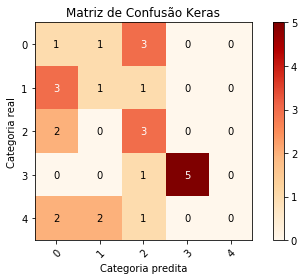

In [21]:
# Matriz de confusão

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# função para criar a matriz de confusão
# fonte: documentação do sklearn
nm_clss_alvo = [0, 1]

def plot_confusion_matrix(y_true,
                          y_pred, 
                          classes,
                          nome_modelo,
                          normalize = False,
                          title     = None,
                          cmap      = plt.cm.OrRd):

    title = 'Matriz de Confusão ' + nome_modelo

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax = ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Categoria real',
           xlabel='Categoria predita')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision = 2)

plot_confusion_matrix(y_test, y_pred, nm_clss_alvo, 'Keras')

### 5. Salvar o modelo

In [22]:
model.save('BBi9FaceSentimentos.h5')

___